In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BTC-USD
Start: 2021-01-22 17:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1331 
Tsesting data: 1331 


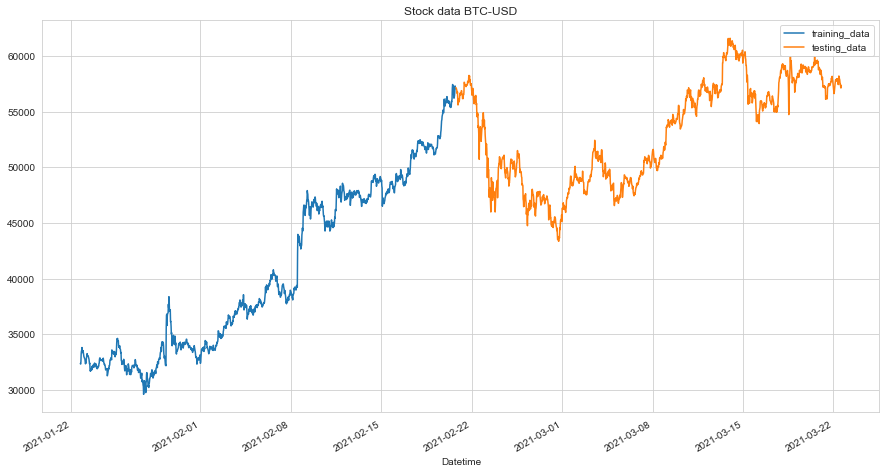

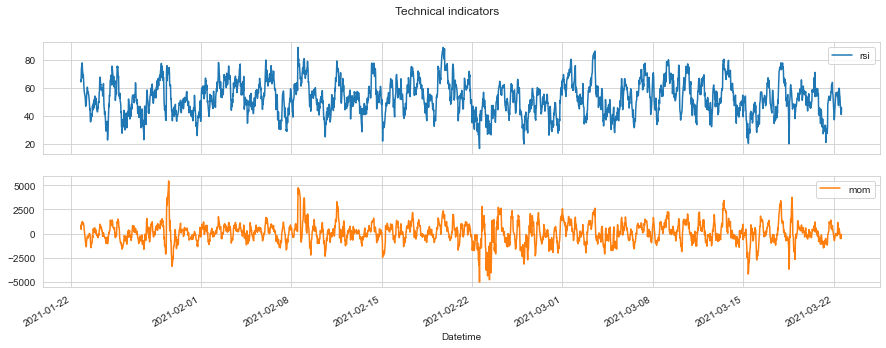

In [8]:
stock_name = 'btc-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [9]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1215.06, duration: 0:00:00.214039
episode: 2/2000, episode end value: 1226.13, duration: 0:00:00.210721
episode: 3/2000, episode end value: 1226.72, duration: 0:00:00.222757
episode: 4/2000, episode end value: 1228.43, duration: 0:00:00.222128
episode: 5/2000, episode end value: 1225.22, duration: 0:00:00.240649
episode: 6/2000, episode end value: 1211.47, duration: 0:00:00.235141
episode: 7/2000, episode end value: 1212.17, duration: 0:00:00.236677
episode: 8/2000, episode end value: 1226.42, duration: 0:00:00.233959
episode: 9/2000, episode end value: 1204.93, duration: 0:00:00.224049
episode: 10/2000, episode end value: 1225.65, duration: 0:00:00.225049
episode: 11/2000, episode end value: 1225.48, duration: 0:00:00.224130
episode: 12/2000, episode end value: 1232.48, duration: 0:00:00.224138
episode: 13/2000, episode end value: 1232.61, duration: 0:00:00.224462
episode: 14/2000, episode end value: 1233.29, duration: 0:00:00.221135
episode: 15/200

episode: 117/2000, episode end value: 1225.95, duration: 0:00:00.238089
episode: 118/2000, episode end value: 1225.46, duration: 0:00:00.238160
episode: 119/2000, episode end value: 1226.70, duration: 0:00:00.235293
episode: 120/2000, episode end value: 1226.56, duration: 0:00:00.233053
episode: 121/2000, episode end value: 1222.90, duration: 0:00:00.236053
episode: 122/2000, episode end value: 1225.08, duration: 0:00:00.245039
episode: 123/2000, episode end value: 1225.70, duration: 0:00:00.237053
episode: 124/2000, episode end value: 1222.36, duration: 0:00:00.244069
episode: 125/2000, episode end value: 1223.48, duration: 0:00:00.237051
episode: 126/2000, episode end value: 1225.66, duration: 0:00:00.234051
episode: 127/2000, episode end value: 1225.38, duration: 0:00:00.236049
episode: 128/2000, episode end value: 1216.88, duration: 0:00:00.224045
episode: 129/2000, episode end value: 1223.28, duration: 0:00:00.225981
episode: 130/2000, episode end value: 1209.46, duration: 0:00:00

episode: 231/2000, episode end value: 1224.79, duration: 0:00:00.229175
episode: 232/2000, episode end value: 1226.02, duration: 0:00:00.232049
episode: 233/2000, episode end value: 1226.25, duration: 0:00:00.236068
episode: 234/2000, episode end value: 1225.71, duration: 0:00:00.236049
episode: 235/2000, episode end value: 1224.14, duration: 0:00:00.243060
episode: 236/2000, episode end value: 1225.82, duration: 0:00:00.241053
episode: 237/2000, episode end value: 1226.53, duration: 0:00:00.242040
episode: 238/2000, episode end value: 1211.98, duration: 0:00:00.244055
episode: 239/2000, episode end value: 1223.40, duration: 0:00:00.242051
episode: 240/2000, episode end value: 1226.44, duration: 0:00:00.236052
episode: 241/2000, episode end value: 1225.26, duration: 0:00:00.240054
episode: 242/2000, episode end value: 1226.08, duration: 0:00:00.237045
episode: 243/2000, episode end value: 1224.01, duration: 0:00:00.245068
episode: 244/2000, episode end value: 1223.91, duration: 0:00:00

episode: 345/2000, episode end value: 1225.95, duration: 0:00:00.244064
episode: 346/2000, episode end value: 1212.93, duration: 0:00:00.235043
episode: 347/2000, episode end value: 1225.41, duration: 0:00:00.244039
episode: 348/2000, episode end value: 1225.49, duration: 0:00:00.238068
episode: 349/2000, episode end value: 1224.65, duration: 0:00:00.249038
episode: 350/2000, episode end value: 1220.52, duration: 0:00:00.254061
episode: 351/2000, episode end value: 1212.40, duration: 0:00:00.241066
episode: 352/2000, episode end value: 1225.65, duration: 0:00:00.234051
episode: 353/2000, episode end value: 1225.50, duration: 0:00:00.245054
episode: 354/2000, episode end value: 1225.98, duration: 0:00:00.231052
episode: 355/2000, episode end value: 1224.03, duration: 0:00:00.242054
episode: 356/2000, episode end value: 1223.61, duration: 0:00:00.228044
episode: 357/2000, episode end value: 1213.38, duration: 0:00:00.234058
episode: 358/2000, episode end value: 1225.20, duration: 0:00:00

episode: 459/2000, episode end value: 1230.24, duration: 0:00:00.211064
episode: 460/2000, episode end value: 1230.28, duration: 0:00:00.209030
episode: 461/2000, episode end value: 1231.37, duration: 0:00:00.213064
episode: 462/2000, episode end value: 1217.89, duration: 0:00:00.206027
episode: 463/2000, episode end value: 1207.69, duration: 0:00:00.213048
episode: 464/2000, episode end value: 1225.07, duration: 0:00:00.211552
episode: 465/2000, episode end value: 1224.44, duration: 0:00:00.215295
episode: 466/2000, episode end value: 1230.06, duration: 0:00:00.204006
episode: 467/2000, episode end value: 1230.75, duration: 0:00:00.226825
episode: 468/2000, episode end value: 1224.69, duration: 0:00:00.221050
episode: 469/2000, episode end value: 1223.64, duration: 0:00:00.220031
episode: 470/2000, episode end value: 1225.41, duration: 0:00:00.221032
episode: 471/2000, episode end value: 1229.10, duration: 0:00:00.213043
episode: 472/2000, episode end value: 1230.81, duration: 0:00:00

episode: 573/2000, episode end value: 1230.85, duration: 0:00:00.213053
episode: 574/2000, episode end value: 1229.83, duration: 0:00:00.197037
episode: 575/2000, episode end value: 1223.89, duration: 0:00:00.212046
episode: 576/2000, episode end value: 1229.90, duration: 0:00:00.211047
episode: 577/2000, episode end value: 1231.61, duration: 0:00:00.233683
episode: 578/2000, episode end value: 1226.73, duration: 0:00:00.218903
episode: 579/2000, episode end value: 1233.18, duration: 0:00:00.220320
episode: 580/2000, episode end value: 1230.48, duration: 0:00:00.227055
episode: 581/2000, episode end value: 1233.07, duration: 0:00:00.206033
episode: 582/2000, episode end value: 1232.79, duration: 0:00:00.209049
episode: 583/2000, episode end value: 1228.16, duration: 0:00:00.227065
episode: 584/2000, episode end value: 1230.50, duration: 0:00:00.211064
episode: 585/2000, episode end value: 1229.56, duration: 0:00:00.223033
episode: 586/2000, episode end value: 1228.93, duration: 0:00:00

episode: 687/2000, episode end value: 1225.81, duration: 0:00:00.313069
episode: 688/2000, episode end value: 1224.74, duration: 0:00:00.299066
episode: 689/2000, episode end value: 1210.48, duration: 0:00:00.316071
episode: 690/2000, episode end value: 1224.74, duration: 0:00:00.324090
episode: 691/2000, episode end value: 1224.36, duration: 0:00:00.326051
episode: 692/2000, episode end value: 1224.47, duration: 0:00:00.321069
episode: 693/2000, episode end value: 1224.79, duration: 0:00:00.311070
episode: 694/2000, episode end value: 1223.84, duration: 0:00:00.312072
episode: 695/2000, episode end value: 1224.30, duration: 0:00:00.320068
episode: 696/2000, episode end value: 1210.28, duration: 0:00:00.318073
episode: 697/2000, episode end value: 1209.96, duration: 0:00:00.317071
episode: 698/2000, episode end value: 1209.96, duration: 0:00:00.324089
episode: 699/2000, episode end value: 1209.83, duration: 0:00:00.320060
episode: 700/2000, episode end value: 1210.37, duration: 0:00:00

episode: 801/2000, episode end value: 1206.19, duration: 0:00:00.348076
episode: 802/2000, episode end value: 1223.61, duration: 0:00:00.334074
episode: 803/2000, episode end value: 1223.62, duration: 0:00:00.334074
episode: 804/2000, episode end value: 1223.95, duration: 0:00:00.346077
episode: 805/2000, episode end value: 1210.44, duration: 0:00:00.342079
episode: 806/2000, episode end value: 1223.54, duration: 0:00:00.330072
episode: 807/2000, episode end value: 1210.49, duration: 0:00:00.332076
episode: 808/2000, episode end value: 1210.44, duration: 0:00:00.339075
episode: 809/2000, episode end value: 1210.00, duration: 0:00:00.354079
episode: 810/2000, episode end value: 1210.35, duration: 0:00:00.336078
episode: 811/2000, episode end value: 1210.61, duration: 0:00:00.353590
episode: 812/2000, episode end value: 1209.75, duration: 0:00:00.370079
episode: 813/2000, episode end value: 1210.35, duration: 0:00:00.362303
episode: 814/2000, episode end value: 1223.73, duration: 0:00:00

episode: 915/2000, episode end value: 1210.20, duration: 0:00:00.417097
episode: 916/2000, episode end value: 1209.98, duration: 0:00:00.462611
episode: 917/2000, episode end value: 1209.83, duration: 0:00:00.405451
episode: 918/2000, episode end value: 1210.56, duration: 0:00:00.432727
episode: 919/2000, episode end value: 1209.71, duration: 0:00:00.421099
episode: 920/2000, episode end value: 1210.45, duration: 0:00:00.421091
episode: 921/2000, episode end value: 1223.08, duration: 0:00:00.428097
episode: 922/2000, episode end value: 1212.07, duration: 0:00:00.444684
episode: 923/2000, episode end value: 1210.17, duration: 0:00:00.405384
episode: 924/2000, episode end value: 1209.70, duration: 0:00:00.418092
episode: 925/2000, episode end value: 1209.38, duration: 0:00:00.405092
episode: 926/2000, episode end value: 1210.57, duration: 0:00:00.404093
episode: 927/2000, episode end value: 1210.36, duration: 0:00:00.405096
episode: 928/2000, episode end value: 1223.34, duration: 0:00:00

episode: 1029/2000, episode end value: 1224.57, duration: 0:00:00.508114
episode: 1030/2000, episode end value: 1226.75, duration: 0:00:00.468106
episode: 1031/2000, episode end value: 1224.22, duration: 0:00:00.415097
episode: 1032/2000, episode end value: 1211.78, duration: 0:00:00.391083
episode: 1033/2000, episode end value: 1225.78, duration: 0:00:00.371081
episode: 1034/2000, episode end value: 1225.11, duration: 0:00:00.376090
episode: 1035/2000, episode end value: 1224.83, duration: 0:00:00.383080
episode: 1036/2000, episode end value: 1226.09, duration: 0:00:00.386089
episode: 1037/2000, episode end value: 1225.79, duration: 0:00:00.416093
episode: 1038/2000, episode end value: 1212.94, duration: 0:00:00.382087
episode: 1039/2000, episode end value: 1225.05, duration: 0:00:00.388090
episode: 1040/2000, episode end value: 1225.46, duration: 0:00:00.408089
episode: 1041/2000, episode end value: 1223.22, duration: 0:00:00.396087
episode: 1042/2000, episode end value: 1227.70, dur

episode: 1142/2000, episode end value: 1227.22, duration: 0:00:00.395093
episode: 1143/2000, episode end value: 1231.29, duration: 0:00:00.343077
episode: 1144/2000, episode end value: 1231.34, duration: 0:00:00.373693
episode: 1145/2000, episode end value: 1231.30, duration: 0:00:00.314794
episode: 1146/2000, episode end value: 1231.39, duration: 0:00:00.361081
episode: 1147/2000, episode end value: 1227.79, duration: 0:00:00.342074
episode: 1148/2000, episode end value: 1230.39, duration: 0:00:00.292066
episode: 1149/2000, episode end value: 1231.80, duration: 0:00:00.302072
episode: 1150/2000, episode end value: 1230.74, duration: 0:00:00.352078
episode: 1151/2000, episode end value: 1230.44, duration: 0:00:00.311070
episode: 1152/2000, episode end value: 1226.01, duration: 0:00:00.327117
episode: 1153/2000, episode end value: 1229.63, duration: 0:00:00.322550
episode: 1154/2000, episode end value: 1227.96, duration: 0:00:00.322033
episode: 1155/2000, episode end value: 1228.21, dur

episode: 1255/2000, episode end value: 1234.55, duration: 0:00:00.339076
episode: 1256/2000, episode end value: 1228.22, duration: 0:00:00.326077
episode: 1257/2000, episode end value: 1230.32, duration: 0:00:00.325071
episode: 1258/2000, episode end value: 1225.73, duration: 0:00:00.371084
episode: 1259/2000, episode end value: 1232.12, duration: 0:00:00.320072
episode: 1260/2000, episode end value: 1231.80, duration: 0:00:00.317071
episode: 1261/2000, episode end value: 1231.17, duration: 0:00:00.328080
episode: 1262/2000, episode end value: 1232.77, duration: 0:00:00.332073
episode: 1263/2000, episode end value: 1230.82, duration: 0:00:00.345077
episode: 1264/2000, episode end value: 1225.23, duration: 0:00:00.322072
episode: 1265/2000, episode end value: 1228.70, duration: 0:00:00.358080
episode: 1266/2000, episode end value: 1233.87, duration: 0:00:00.320074
episode: 1267/2000, episode end value: 1231.49, duration: 0:00:00.325073
episode: 1268/2000, episode end value: 1231.13, dur

episode: 1368/2000, episode end value: 1225.51, duration: 0:00:00.312067
episode: 1369/2000, episode end value: 1209.03, duration: 0:00:00.326073
episode: 1370/2000, episode end value: 1226.06, duration: 0:00:00.330075
episode: 1371/2000, episode end value: 1229.37, duration: 0:00:00.352075
episode: 1372/2000, episode end value: 1223.16, duration: 0:00:00.329074
episode: 1373/2000, episode end value: 1221.98, duration: 0:00:00.400091
episode: 1374/2000, episode end value: 1222.92, duration: 0:00:00.387084
episode: 1375/2000, episode end value: 1231.56, duration: 0:00:00.367084
episode: 1376/2000, episode end value: 1228.46, duration: 0:00:00.332073
episode: 1377/2000, episode end value: 1229.62, duration: 0:00:00.319072
episode: 1378/2000, episode end value: 1213.16, duration: 0:00:00.322069
episode: 1379/2000, episode end value: 1226.03, duration: 0:00:00.320076
episode: 1380/2000, episode end value: 1214.62, duration: 0:00:00.338080
episode: 1381/2000, episode end value: 1224.87, dur

episode: 1481/2000, episode end value: 1224.86, duration: 0:00:00.383349
episode: 1482/2000, episode end value: 1224.66, duration: 0:00:00.351081
episode: 1483/2000, episode end value: 1225.51, duration: 0:00:00.388089
episode: 1484/2000, episode end value: 1224.40, duration: 0:00:00.384082
episode: 1485/2000, episode end value: 1224.93, duration: 0:00:00.351079
episode: 1486/2000, episode end value: 1223.67, duration: 0:00:00.390089
episode: 1487/2000, episode end value: 1224.65, duration: 0:00:00.353077
episode: 1488/2000, episode end value: 1223.80, duration: 0:00:00.387093
episode: 1489/2000, episode end value: 1225.05, duration: 0:00:00.369083
episode: 1490/2000, episode end value: 1225.08, duration: 0:00:00.361129
episode: 1491/2000, episode end value: 1224.29, duration: 0:00:00.372109
episode: 1492/2000, episode end value: 1225.28, duration: 0:00:00.387093
episode: 1493/2000, episode end value: 1228.53, duration: 0:00:00.389610
episode: 1494/2000, episode end value: 1225.01, dur

episode: 1594/2000, episode end value: 1223.85, duration: 0:00:00.492112
episode: 1595/2000, episode end value: 1224.04, duration: 0:00:00.466109
episode: 1596/2000, episode end value: 1224.92, duration: 0:00:00.434094
episode: 1597/2000, episode end value: 1226.81, duration: 0:00:00.422094
episode: 1598/2000, episode end value: 1225.26, duration: 0:00:00.414097
episode: 1599/2000, episode end value: 1225.71, duration: 0:00:00.417093
episode: 1600/2000, episode end value: 1225.86, duration: 0:00:00.405090
episode: 1601/2000, episode end value: 1224.17, duration: 0:00:00.387088
episode: 1602/2000, episode end value: 1223.94, duration: 0:00:00.443095
episode: 1603/2000, episode end value: 1223.85, duration: 0:00:00.407091
episode: 1604/2000, episode end value: 1225.90, duration: 0:00:00.357082
episode: 1605/2000, episode end value: 1224.71, duration: 0:00:00.405088
episode: 1606/2000, episode end value: 1224.91, duration: 0:00:00.423095
episode: 1607/2000, episode end value: 1226.04, dur

episode: 1707/2000, episode end value: 1226.33, duration: 0:00:00.400090
episode: 1708/2000, episode end value: 1226.05, duration: 0:00:00.395090
episode: 1709/2000, episode end value: 1225.12, duration: 0:00:00.395086
episode: 1710/2000, episode end value: 1225.55, duration: 0:00:00.420095
episode: 1711/2000, episode end value: 1225.52, duration: 0:00:00.360083
episode: 1712/2000, episode end value: 1224.64, duration: 0:00:00.377082
episode: 1713/2000, episode end value: 1225.65, duration: 0:00:00.385085
episode: 1714/2000, episode end value: 1225.17, duration: 0:00:00.395092
episode: 1715/2000, episode end value: 1224.01, duration: 0:00:00.459103
episode: 1716/2000, episode end value: 1226.99, duration: 0:00:00.436100
episode: 1717/2000, episode end value: 1225.62, duration: 0:00:00.396083
episode: 1718/2000, episode end value: 1225.14, duration: 0:00:00.384091
episode: 1719/2000, episode end value: 1224.48, duration: 0:00:00.396084
episode: 1720/2000, episode end value: 1226.78, dur

episode: 1820/2000, episode end value: 1225.04, duration: 0:00:00.397330
episode: 1821/2000, episode end value: 1225.53, duration: 0:00:00.395088
episode: 1822/2000, episode end value: 1228.16, duration: 0:00:00.371085
episode: 1823/2000, episode end value: 1226.00, duration: 0:00:00.382086
episode: 1824/2000, episode end value: 1224.66, duration: 0:00:00.360081
episode: 1825/2000, episode end value: 1224.84, duration: 0:00:00.409092
episode: 1826/2000, episode end value: 1224.14, duration: 0:00:00.383087
episode: 1827/2000, episode end value: 1225.15, duration: 0:00:00.398093
episode: 1828/2000, episode end value: 1223.42, duration: 0:00:00.443095
episode: 1829/2000, episode end value: 1224.93, duration: 0:00:00.388090
episode: 1830/2000, episode end value: 1224.48, duration: 0:00:00.387088
episode: 1831/2000, episode end value: 1224.62, duration: 0:00:00.366080
episode: 1832/2000, episode end value: 1224.30, duration: 0:00:00.377091
episode: 1833/2000, episode end value: 1224.90, dur

episode: 1933/2000, episode end value: 1224.86, duration: 0:00:00.368080
episode: 1934/2000, episode end value: 1225.67, duration: 0:00:00.410090
episode: 1935/2000, episode end value: 1225.58, duration: 0:00:00.378085
episode: 1936/2000, episode end value: 1222.94, duration: 0:00:00.366083
episode: 1937/2000, episode end value: 1226.39, duration: 0:00:00.461747
episode: 1938/2000, episode end value: 1224.38, duration: 0:00:00.399815
episode: 1939/2000, episode end value: 1224.06, duration: 0:00:00.419046
episode: 1940/2000, episode end value: 1224.54, duration: 0:00:00.384089
episode: 1941/2000, episode end value: 1224.67, duration: 0:00:00.374078
episode: 1942/2000, episode end value: 1226.23, duration: 0:00:00.443101
episode: 1943/2000, episode end value: 1224.32, duration: 0:00:00.369085
episode: 1944/2000, episode end value: 1223.38, duration: 0:00:00.401089
episode: 1945/2000, episode end value: 1224.84, duration: 0:00:00.376089
episode: 1946/2000, episode end value: 1225.36, dur

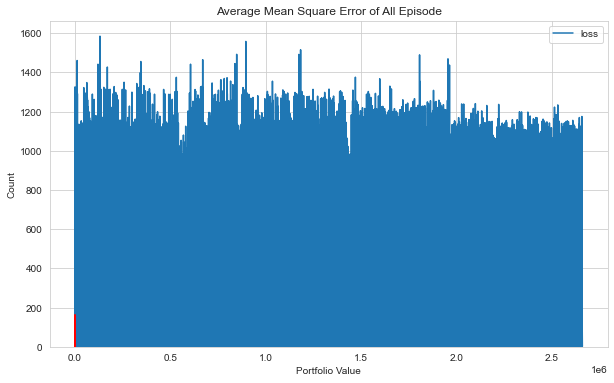

In [10]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

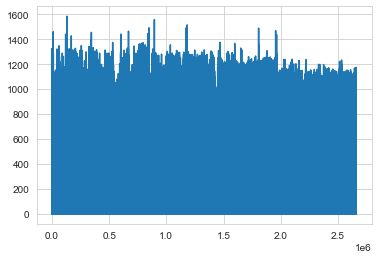

In [11]:
plt.plot(agent.model.losses)

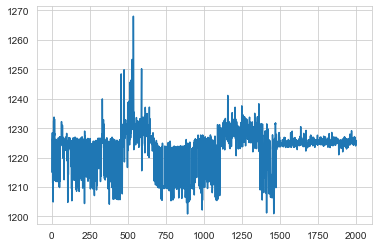

In [12]:
plt.plot(portfolio_value)

episode end value: 1054.34, duration: 0:00:00.280059
Sell: 701 times, Buy: 629 times


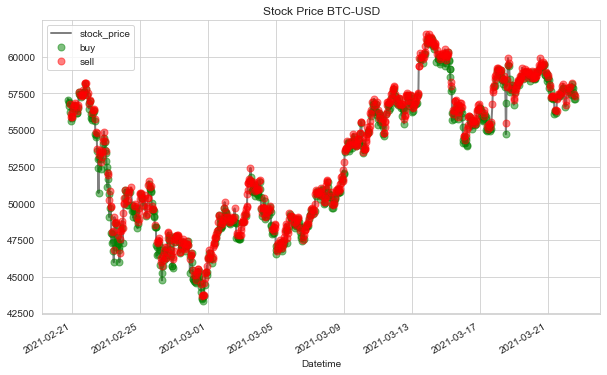

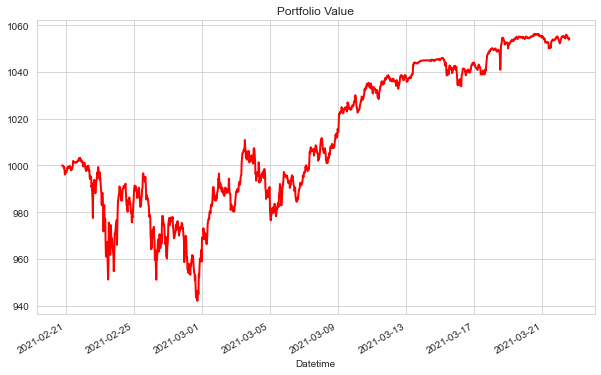

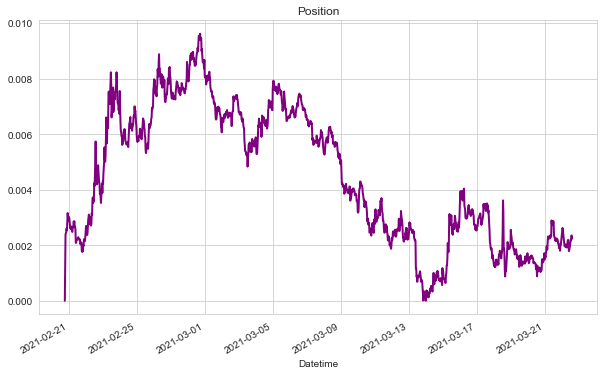

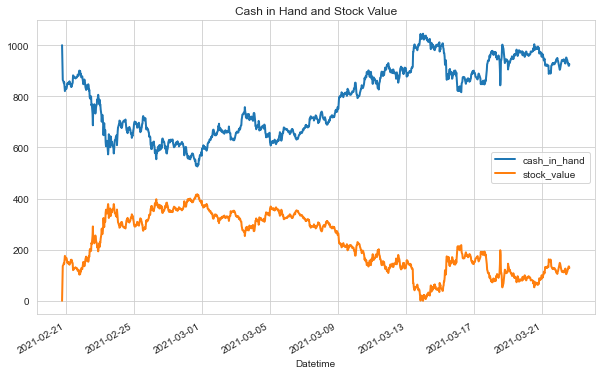

In [13]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [14]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BTC-USD
Start: 2021-02-20 18:30:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.01 %
Volatility: 0.0346
shape ratio: -0.0269
Maximun drawdown: -6.09 %
Calmar ratio: 0.1653
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 0.06 %
Volatility (benchmark): 0.1209
shape ratio: -0.0858
Maximun drawdown: -25.58 %
Calmar ratio (benchmark): 0.0024


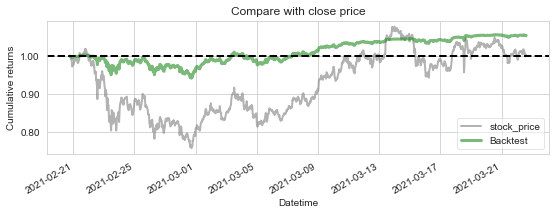

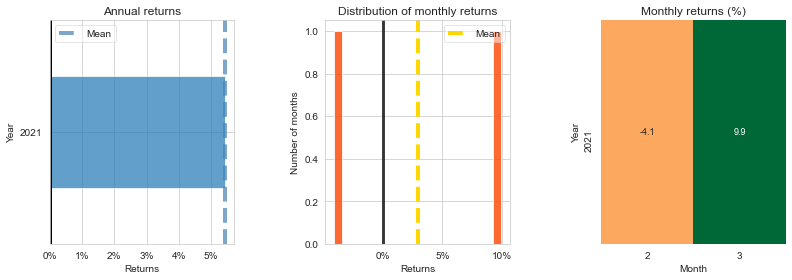

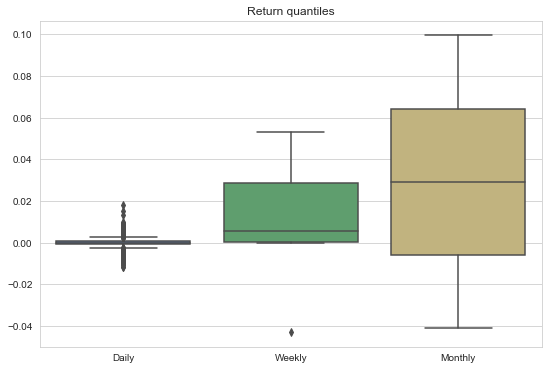

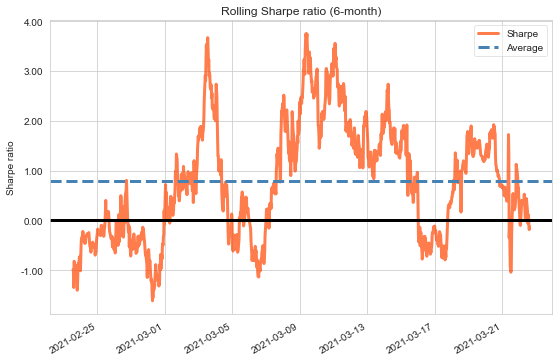

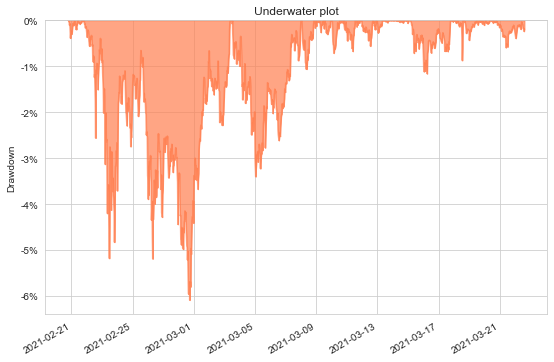

In [15]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')